# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.


##### 1. Metrics and Techniques
I used a lot of descriptives analysis techniques utilizing pandas .describe(), .info(), .value_counts() to assess the datasets. 
Accuracy: Checking if ranges fall into an acceptable range (i.e. dates not in the future, annual amounts paid for insurance, home market value

Completeness: Assessing the percentage of non-null values in each column or row.

Consistency: 

Timeliness:

Validity:


CUST START DATE NEEDS TO BE AFTER CUST ORIGINAL DATE

Handling of large numbers of same birth dates


 

##### 2. Issues with datasets 


##### 3. After cleaning the data improve 

In [3]:
# Loading libraries

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [4]:
# Loading datasets
customer_df = pd.read_csv("ABC_df_customer.csv")
demographics_df = pd.read_csv("ABC_df_demographic.csv")
termination_df = pd.read_csv("ABC_df_termination.csv")

/var/folders/6q/cbfnzq6520s5218jsw51rpg40000gn/T/ipykernel_72725/479250703.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv("ABC_df_customer.csv")


#### Customer DF Short Statistics

In [11]:
# customer_df short stats
customer_df.drop(columns='Unnamed: 0', inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
customer_df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [13]:
customer_df.shape

(2303124, 9)

In [14]:
customer_df.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.303123e+06,2.303123e+06,2.303124e+06,2.303124e+06,2.303124e+06
mean,2.213018e+11,5.213007e+11,1.431069e+03,5.725299e+02,4.293221e+02
std,9.915268e+05,4.170653e+05,2.439311e+02,1.896686e+02,7.606463e+01
min,2.213000e+11,5.213000e+11,2.869633e+02,-3.516244e+02,9.000000e+01
25%,2.213009e+11,5.213003e+11,1.264830e+03,4.442061e+02,3.770000e+02
50%,2.213018e+11,5.213007e+11,1.425758e+03,5.720247e+02,4.270000e+02
75%,2.213027e+11,5.213010e+11,1.591793e+03,7.001292e+02,4.790000e+02
max,2.213033e+11,5.213015e+11,2.769374e+03,1.617531e+03,8.870000e+02


In [34]:
customer_df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176235 entries, 0 to 2280320
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           2176234 non-null  float64       
 1   ADDRESS_ID              2176234 non-null  float64       
 2   CUST_ORIG_DATE          2176235 non-null  object        
 3   DATE_OF_BIRTH           2176235 non-null  object        
 4   SOCIAL_SECURITY_NUMBER  2176235 non-null  object        
 5   CUST_START_DATE         2176235 non-null  datetime64[ns]
 6   CURR_ANN_AMT_CAR        2176235 non-null  float64       
 7   CURR_ANN_AMT_HEALTH     2176235 non-null  float64       
 8   CURR_ANN_AMT_HOUSE      2176235 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 166.0+ MB


In [35]:
customer_df = customer_df.drop_duplicates(subset="INDIVIDUAL_ID", keep=False)

In [36]:
missing_percentage_customer_df = customer_df.isnull().sum() / len(customer_df) * 100
print(missing_percentage_customer_df)

INDIVIDUAL_ID             0.000046
ADDRESS_ID                0.000046
CUST_ORIG_DATE            0.000000
DATE_OF_BIRTH             0.000000
SOCIAL_SECURITY_NUMBER    0.000000
CUST_START_DATE           0.000000
CURR_ANN_AMT_CAR          0.000000
CURR_ANN_AMT_HEALTH       0.000000
CURR_ANN_AMT_HOUSE        0.000000
dtype: float64


In [37]:
# Check dataframe for duplicates
customer_df.duplicated().sum()

0

##### Variable: CUST_ORIG_DATE

In [38]:
# Format into datetime object
customer_df['CUST_ORIG_DATE'] = pd.to_datetime(customer_df['CUST_ORIG_DATE'])

In [39]:
customer_df['CUST_ORIG_DATE'].value_counts()

2005-09-11    574325
2022-09-13     41465
2019-08-16     40756
2022-06-24     21660
2014-02-15     21225
               ...  
2020-06-02         1
2014-04-05         1
2014-03-24         1
2008-12-02         1
2014-01-22         1
Name: CUST_ORIG_DATE, Length: 5252, dtype: int64

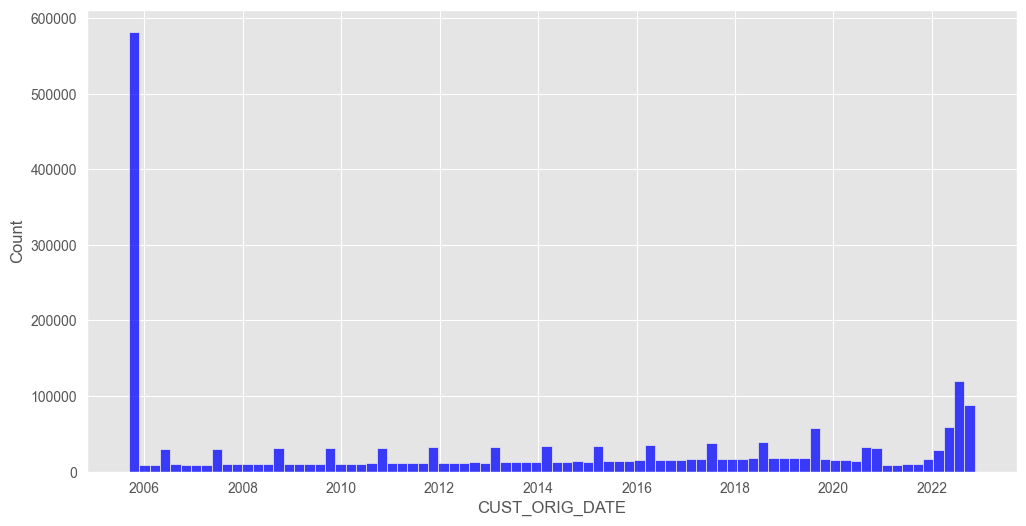

In [40]:
sns.histplot(customer_df['CUST_ORIG_DATE'], color="blue")
plt.show()

##### Variable: DATE_OF_BIRTH 

In [41]:
#transform into datetime
customer_df['DATE_OF_BIRTH'] = pd.to_datetime(customer_df['DATE_OF_BIRTH'])

In [42]:
customer_df['DATE_OF_BIRTH'].value_counts()

1967-07-07    381253
1970-07-26      3971
1967-06-27      3947
1968-06-26      3933
1970-06-25      3927
               ...  
1910-09-09         1
1909-02-07         1
1908-12-11         1
1913-06-08         1
1910-10-10         1
Name: DATE_OF_BIRTH, Length: 3491, dtype: int64

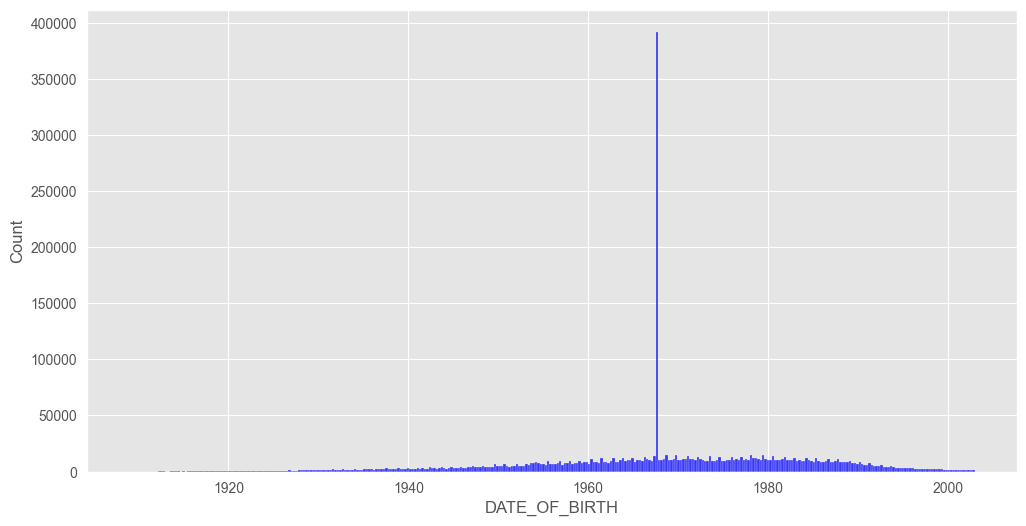

In [43]:
sns.histplot(customer_df['DATE_OF_BIRTH'], color="blue")
plt.show()

Date of birth als jahres bins

In [44]:
#customer_df = customer_df[(customer_df['DATE_OF_BIRTH'] < "1967-07-07") | (customer_df['DATE_OF_BIRTH'] > "1967-07-07")]


In [45]:
customer_df["BIRTH_YEAR"] = customer_df["DATE_OF_BIRTH"].dt.year

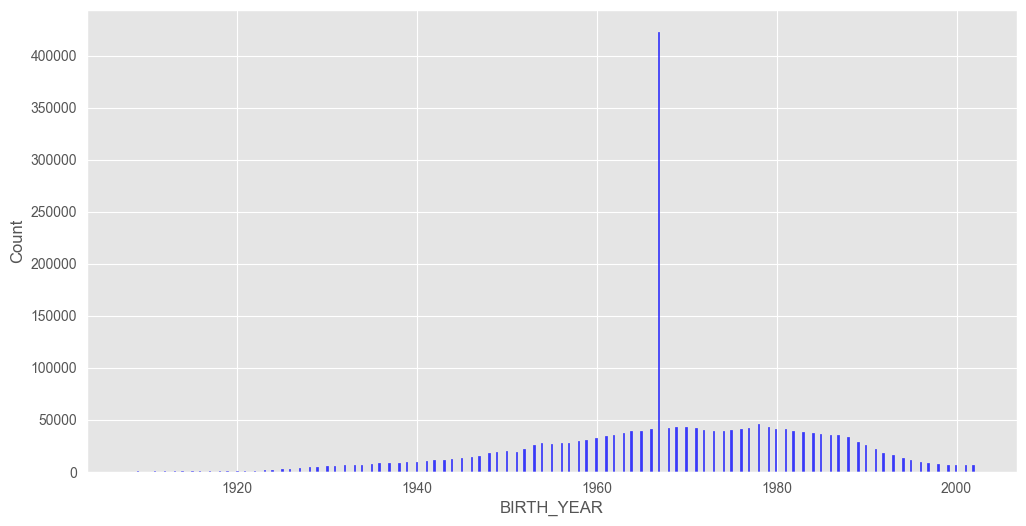

In [46]:
sns.histplot(customer_df['BIRTH_YEAR'], color="blue")
plt.show()

##### Variable: CUST_START_DATE

In [47]:
# Transform into datetime
customer_df["CUST_START_DATE"] = pd.to_datetime(customer_df["CUST_START_DATE"])

In [48]:
customer_df['CUST_START_DATE'].value_counts()

2005-09-11    535157
2022-09-13     39806
2019-08-16     38862
2022-06-24     20807
2014-02-15     20057
               ...  
1999-07-27         1
1989-04-18         1
1990-05-06         1
1988-12-12         1
1992-09-01         1
Name: CUST_START_DATE, Length: 12317, dtype: int64

2040 löschen!!

In [49]:
customer_df['CUST_START_DATE'].isna().sum()

0

In [51]:
customer_df.info(show_counts=True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176235 entries, 0 to 2280320
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   INDIVIDUAL_ID           2176234 non-null  float64       
 1   ADDRESS_ID              2176234 non-null  float64       
 2   CUST_ORIG_DATE          2176235 non-null  datetime64[ns]
 3   DATE_OF_BIRTH           2176235 non-null  datetime64[ns]
 4   SOCIAL_SECURITY_NUMBER  2176235 non-null  object        
 5   CUST_START_DATE         2176235 non-null  datetime64[ns]
 6   CURR_ANN_AMT_CAR        2176235 non-null  float64       
 7   CURR_ANN_AMT_HEALTH     2176235 non-null  float64       
 8   CURR_ANN_AMT_HOUSE      2176235 non-null  int64         
 9   BIRTH_YEAR              2176235 non-null  int64         
dtypes: datetime64[ns](3), float64(4), int64(2), object(1)
memory usage: 182.6+ MB


In [ ]:
customer_df = customer_df[customer_df['CUST_START_DATE'] <= "2023-11-12"]

In [ ]:
customer_df['CUST_START_DATE'].value_counts()

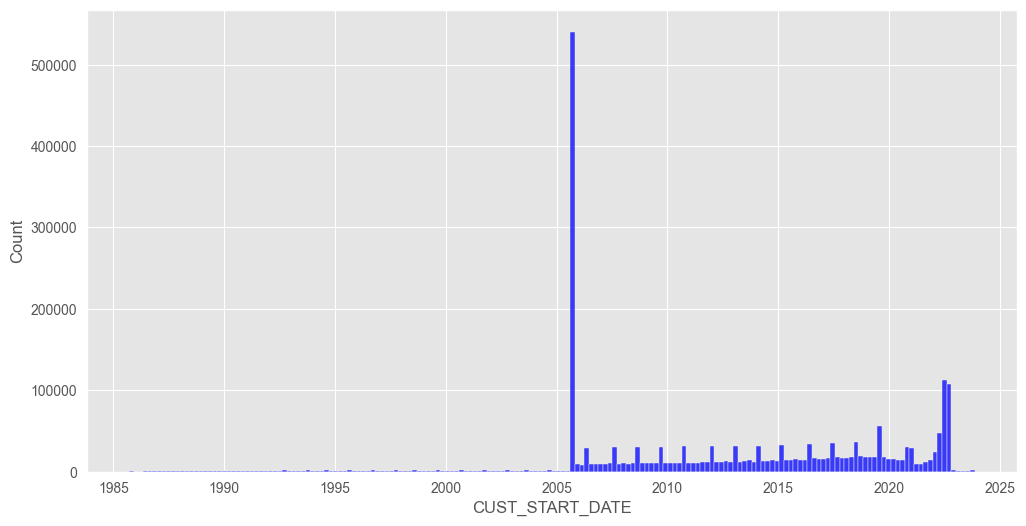

In [52]:
sns.histplot(customer_df['CUST_START_DATE'], color="blue")
plt.show()

cust start date sampling for modelling?


##### Variable: CURR_ANN_AMT_CAR

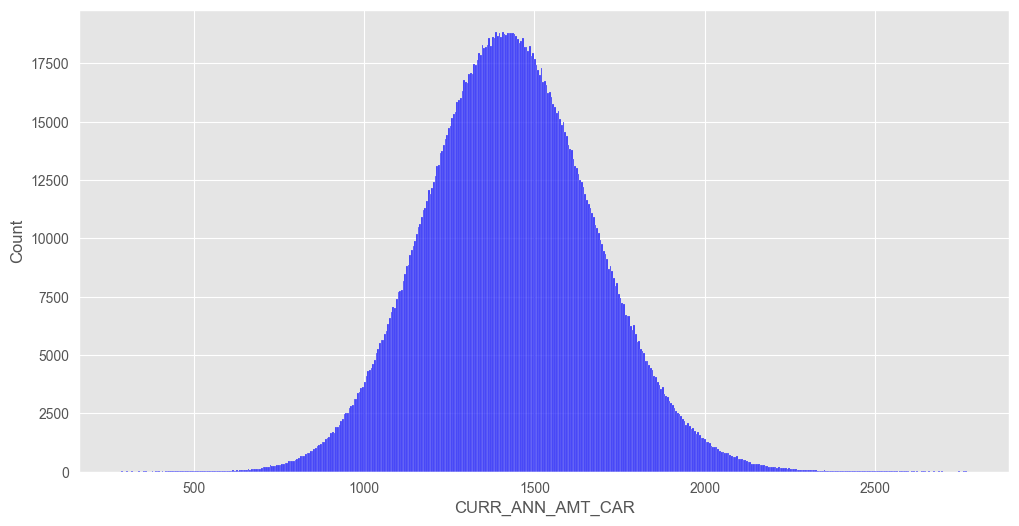

In [183]:
sns.histplot(customer_df["CURR_ANN_AMT_CAR"], color="blue")
plt.show()

##### Variable: CURR_ANN_AMT_HOUSE

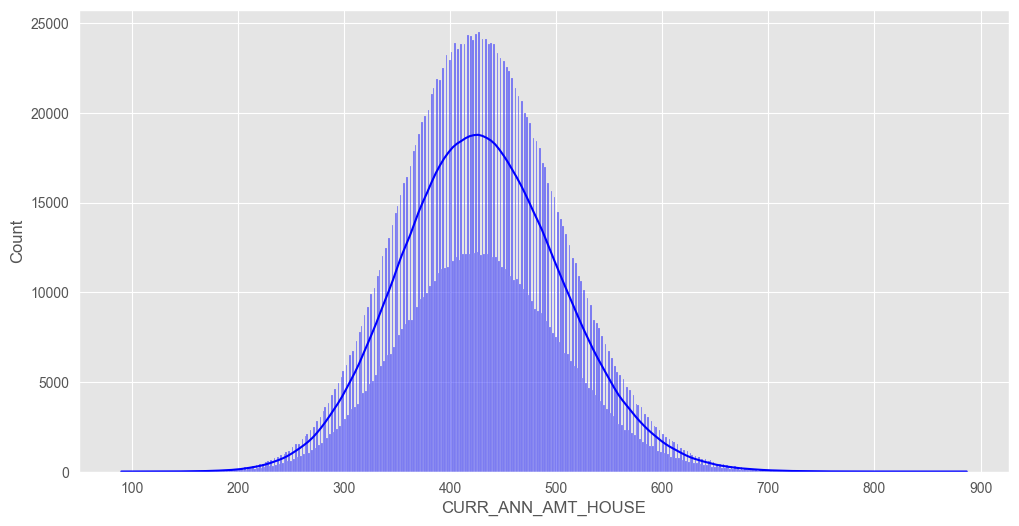

In [186]:
sns.histplot(customer_df["CURR_ANN_AMT_HOUSE"], color="blue", kde=True)
plt.show()

##### Variable: CURR_ANN_AMT_HEALTH

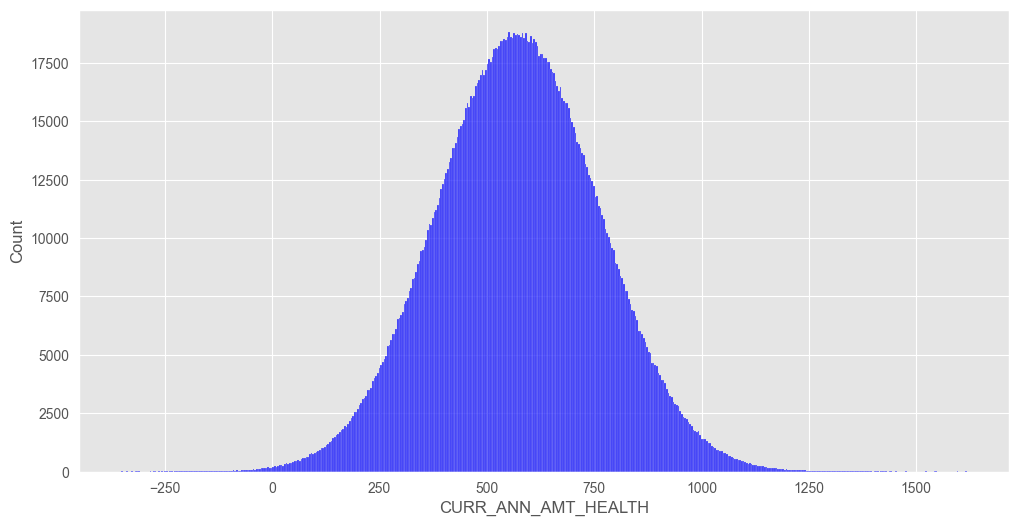

In [187]:
sns.histplot(customer_df["CURR_ANN_AMT_HEALTH"], color="blue")
plt.show()

In [283]:
customer_df2 = customer_df[customer_df["CUST_START_DATE"] >= customer_df["CUST_ORIG_DATE"]]

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366
...,...,...,...,...,...,...,...,...,...,...
2280316,2280316,2.213008e+11,5.213003e+11,2019-06-23,1970-07-26,730-XX-5654,2019-06-23,1604.105051,826.368696,485
2280317,2280317,2.213004e+11,5.213001e+11,2022-07-13,1985-07-22,306-XX-2712,2022-07-13,1689.749774,870.687170,500
2280318,2280318,2.213024e+11,5.213009e+11,2018-07-10,1967-07-07,800-XX-2726,2018-07-10,862.145424,376.816468,220
2280319,2280319,2.213006e+11,5.213002e+11,2005-09-11,1998-11-09,198-XX-4107,2005-09-11,1111.694247,741.870696,331


##### Issues in the customer_df dataset

1. Missing values for the "CUST_START_DATE" column.
2. Checked the value counts for this column and noted that the majority (535000) of the Start dates are 2005-09-11. Therefore, I filled the rest of these values with the same date, assuming that this date is either a dummy date or a human error. 
3. 404695 entries have their birthday on the 7th of July 1967. While this could be a coincidence this high number suggests, that the birth date can't be a relevant variable because the number of ID's in the dataset are too skewed towards that date.
4. The Customer Original Date (the date the customer originally joined) is equally high represented as the "CUST_START_DATE". 599153 entries for the date *2005-09-11*

#### Demographics Short Statistics

pd. get dummys

In [198]:
demographics_df.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [199]:
demographics_df.shape

(2112579, 10)

In [217]:
demographics_df.info(show_counts=True)
missing_percentage_demographics_df = demographics_df.isnull().sum() / len(demographics_df) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   INDIVIDUAL_ID        2112579 non-null  float64
 1   INCOME               2112579 non-null  float64
 2   HAS_CHILDREN         2112579 non-null  float64
 3   LENGTH_OF_RESIDENCE  2112579 non-null  float64
 4   MARITAL_STATUS       1680931 non-null  object 
 5   HOME_MARKET_VALUE    1922374 non-null  object 
 6   HOME_OWNER           2112579 non-null  int64  
 7   COLLEGE_DEGREE       2112579 non-null  int64  
 8   GOOD_CREDIT          2112579 non-null  int64  
 9   ADVANCED_STUDIES     2112579 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 161.2+ MB



##### Variable: INCOME

In [200]:
print(missing_percentage_demographics_df)

INDIVIDUAL_ID           0.000000
INCOME                  0.000000
HAS_CHILDREN            0.000000
LENGTH_OF_RESIDENCE     0.000000
MARITAL_STATUS         20.432277
HOME_MARKET_VALUE       9.003450
HOME_OWNER              0.000000
COLLEGE_DEGREE          0.000000
GOOD_CREDIT             0.000000
ADVANCED_STUDIES        0.000000
dtype: float64


In [145]:
demographics_df.head(100)

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,1
2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,0
5,2.213031e+11,105000.000,1.0,14.0,Married,100000 - 124999,1,0,1,0
6,2.213031e+11,131250.000,1.0,3.0,Single,75000 - 99999,1,0,1,1
7,2.213031e+11,93750.000,1.0,5.0,Married,50000 - 74999,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
130,2.213019e+11,105000.000,0.0,6.0,Single,75000 - 99999,1,1,1,0
131,2.213019e+11,86250.000,0.0,4.0,Single,125000 - 149999,0,0,1,0
132,2.213018e+11,71250.000,0.0,2.0,Single,75000 - 99999,0,0,1,0
133,2.213018e+11,187500.000,1.0,2.0,Married,400000 - 449999,1,0,1,1


In [146]:
demographics_df.describe()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
count,1.588644e+06,1.588644e+06,1.588644e+06,1.588644e+06,1.588644e+06,1.588644e+06,1.588644e+06
mean,2.213018e+11,1.227876e+05,5.631406e-01,7.906322e+00,8.639859e-01,3.533768e-01,8.453939e-01
std,9.934611e+05,8.192814e+04,5.987818e-01,4.966671e+00,3.428037e-01,4.780186e-01,3.615289e-01
min,2.213000e+11,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,7.125000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.213018e+11,1.050000e+05,1.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,2.213027e+11,1.312500e+05,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00
max,2.213033e+11,3.750000e+05,6.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00


1.0    776319
0.0    760743
2.0     41474
3.0      6932
4.0      1917
5.0       655
6.0       604
Name: HAS_CHILDREN, dtype: int64

##### Variable: HAS_CHILDREN

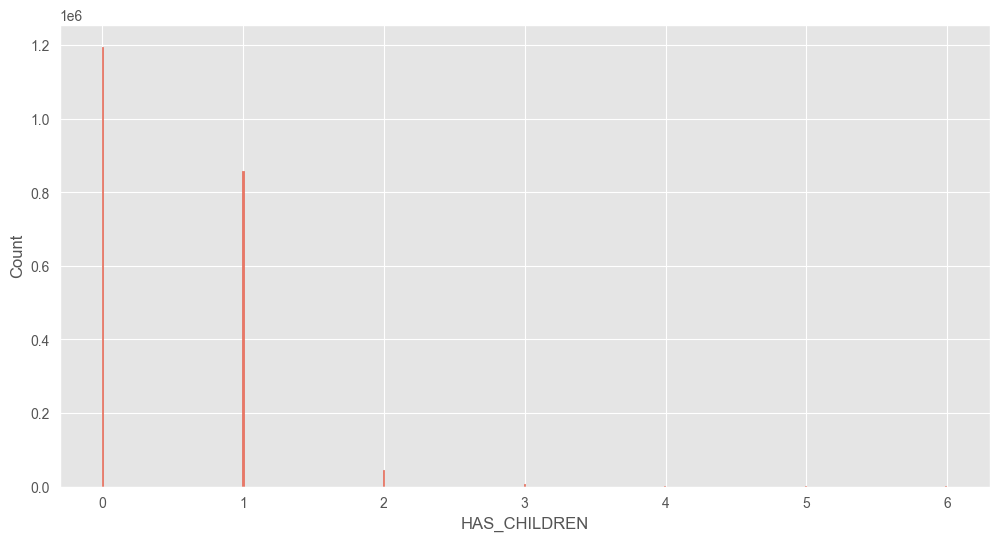

In [211]:
sns.histplot(demographics_df['HAS_CHILDREN'])
plt.show()

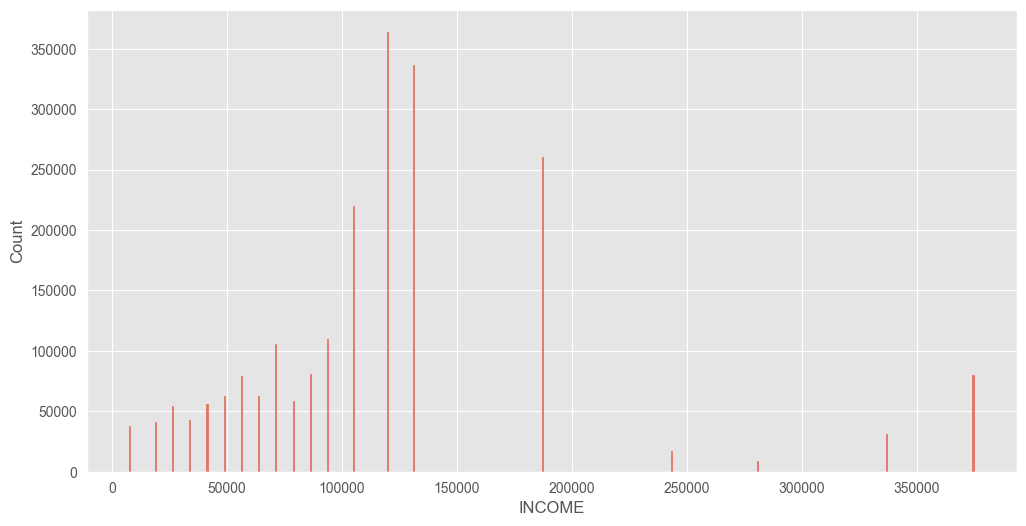

In [210]:
sns.histplot(demographics_df['INCOME'])
plt.show()

##### Variable: LENGTH_OF_RESIDENCE


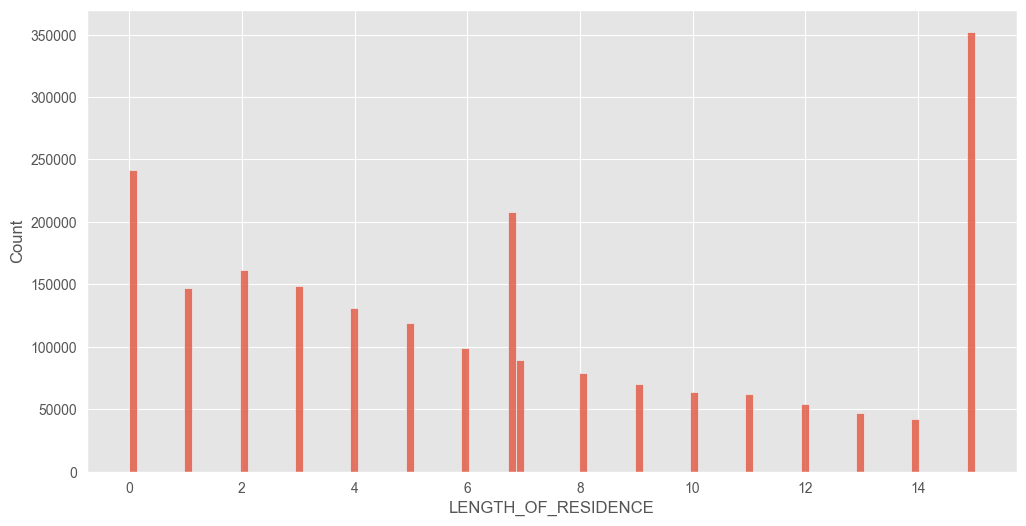

In [209]:
sns.histplot(demographics_df['LENGTH_OF_RESIDENCE'])
plt.show()

##### Variable: MARITAL_STATUS


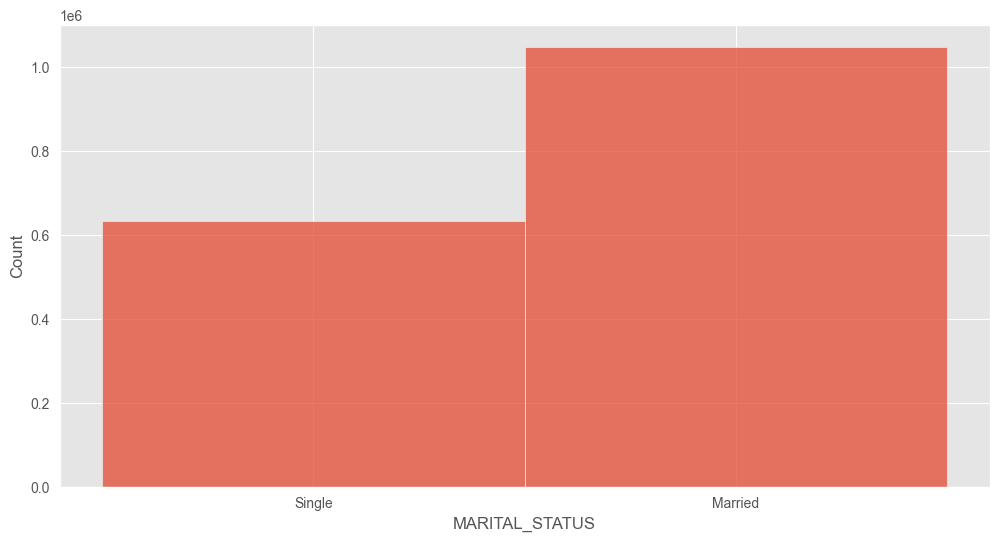

In [207]:
sns.histplot(demographics_df['MARITAL_STATUS'])
plt.show()

##### Variable: HOME_MARKET_VALUE


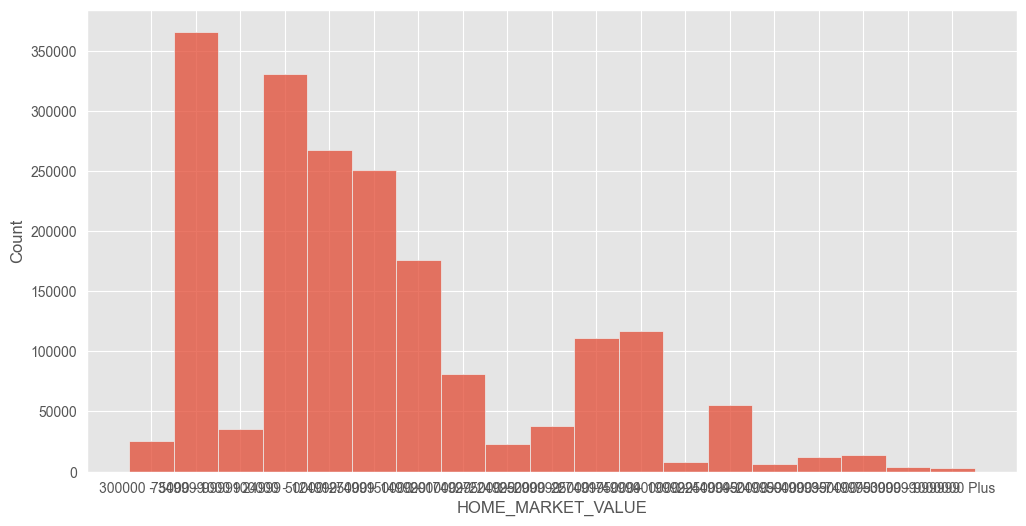

In [212]:
sns.histplot(demographics_df['HOME_MARKET_VALUE'])
plt.show()

##### Variable: HOME_OWNER


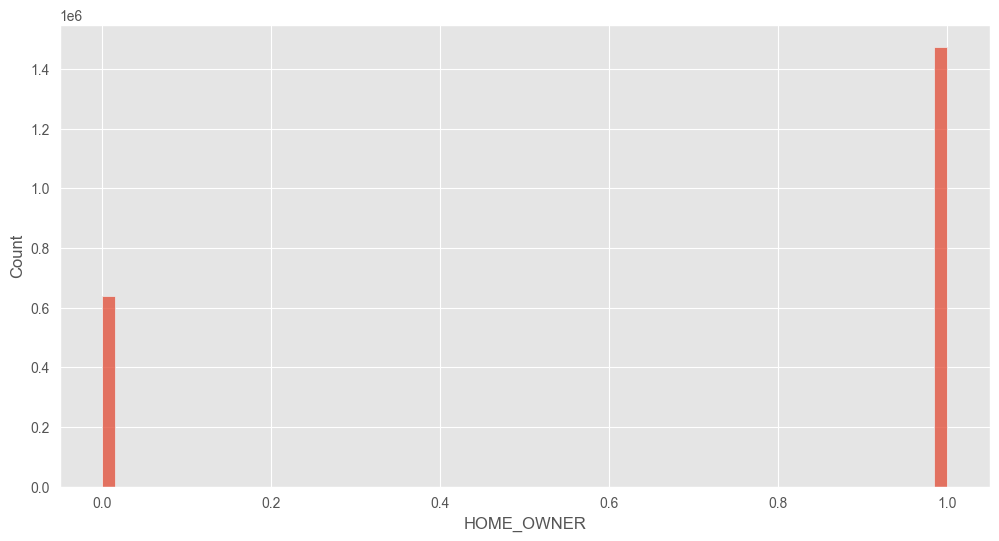

In [213]:
sns.histplot(demographics_df['HOME_OWNER'])
plt.show()

##### Variable: COLLEGE_DEGREE


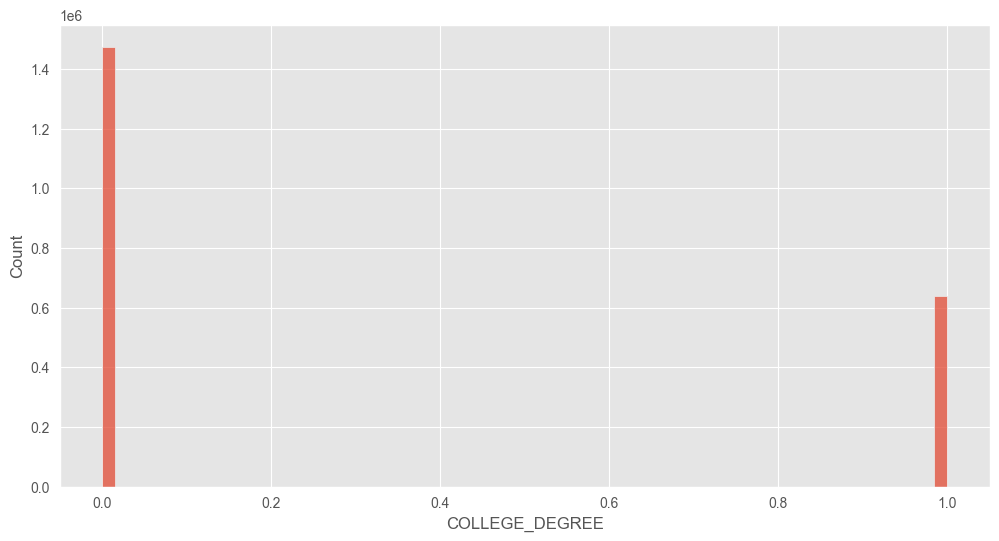

In [214]:
sns.histplot(demographics_df['COLLEGE_DEGREE'])
plt.show()

##### Variable: GOOD_CREDIT


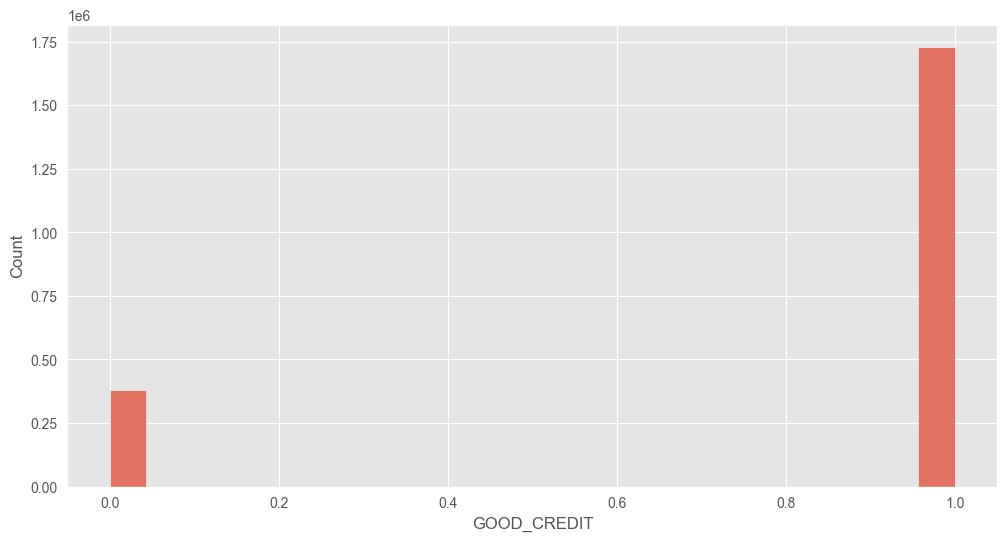

In [215]:
sns.histplot(demographics_df['GOOD_CREDIT'])
plt.show()

In [149]:
demographics_df.duplicated().sum()


0

In [194]:
# Drop column with missing values
#demographics_df = demographics_df.dropna()

In [151]:
demographics_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588644 entries, 0 to 2112578
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   INDIVIDUAL_ID        1588644 non-null  float64
 1   INCOME               1588644 non-null  float64
 2   HAS_CHILDREN         1588644 non-null  float64
 3   LENGTH_OF_RESIDENCE  1588644 non-null  float64
 4   MARITAL_STATUS       1588644 non-null  object 
 5   HOME_MARKET_VALUE    1588644 non-null  object 
 6   HOME_OWNER           1588644 non-null  int64  
 7   COLLEGE_DEGREE       1588644 non-null  int64  
 8   GOOD_CREDIT          1588644 non-null  int64  
 9   ADVANCED_STUDIES     1588644 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 133.3+ MB


##### Variable: ADVANCED_STUDIES


In [203]:
demographics_df['ADVANCED_STUDIES'].replace(to_replace= {'Y': '1', 'N': '0'}, inplace=True)

In [153]:
demographics_df.ADVANCED_STUDIES.value_counts()

0    1229685
1     358959
Name: ADVANCED_STUDIES, dtype: int64

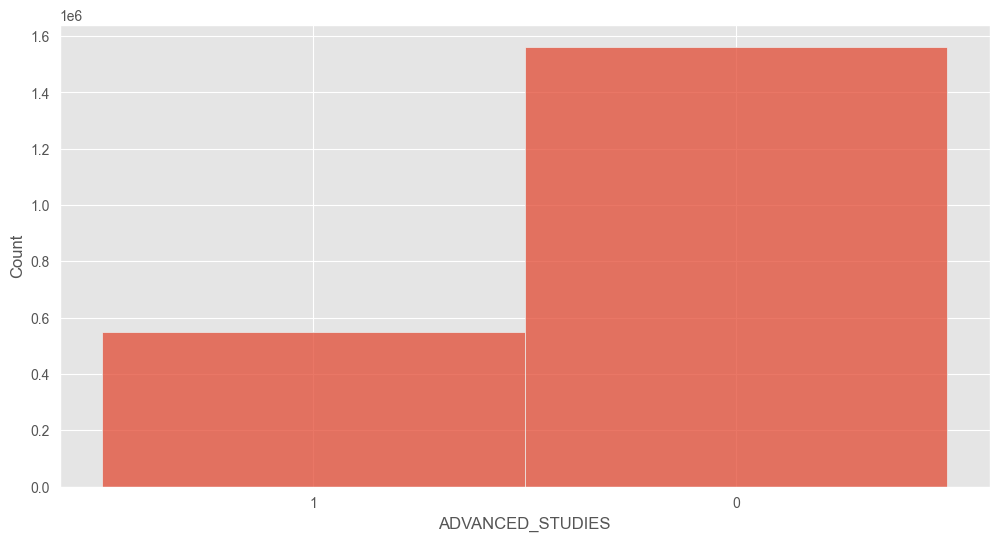

In [216]:
sns.histplot(demographics_df['ADVANCED_STUDIES'])
plt.show()

In [154]:
demographics_df['ADVANCED_STUDIES'].astype(int)

0          1
2          0
5          0
6          1
7          0
          ..
2112574    0
2112575    0
2112576    0
2112577    1
2112578    0
Name: ADVANCED_STUDIES, Length: 1588644, dtype: int64

In [298]:
pd.get_dummies(demographics_df, columns=["MARITAL_STATUS"])

,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single
0,0,2.213028e+11,187500.000,1.0,8.0,300000 - 349999,1,1,1,Y,0,1
1,1,2.213032e+11,63750.000,0.0,0.0,NaN,0,0,0,N,0,1
2,2,2.213032e+11,41250.000,0.0,15.0,75000 - 99999,1,0,1,N,1,0
3,3,2.213032e+11,120558.264,0.0,0.0,1000 - 24999,1,0,0,N,0,0
4,4,2.213032e+11,187500.000,0.0,0.0,NaN,0,0,1,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2112574,2112574,2.213006e+11,131250.000,1.0,12.0,50000 - 74999,1,0,1,N,1,0
2112575,2112575,2.213006e+11,56250.000,1.0,5.0,50000 - 74999,0,0,1,N,0,1
2112576,2112576,2.213006e+11,187500.000,0.0,13.0,225000 - 249999,1,1,1,N,1,0
2112577,2112577,2.213006e+11,187500.000,2.0,12.0,100000 - 124999,1,0,1,Y,1,0


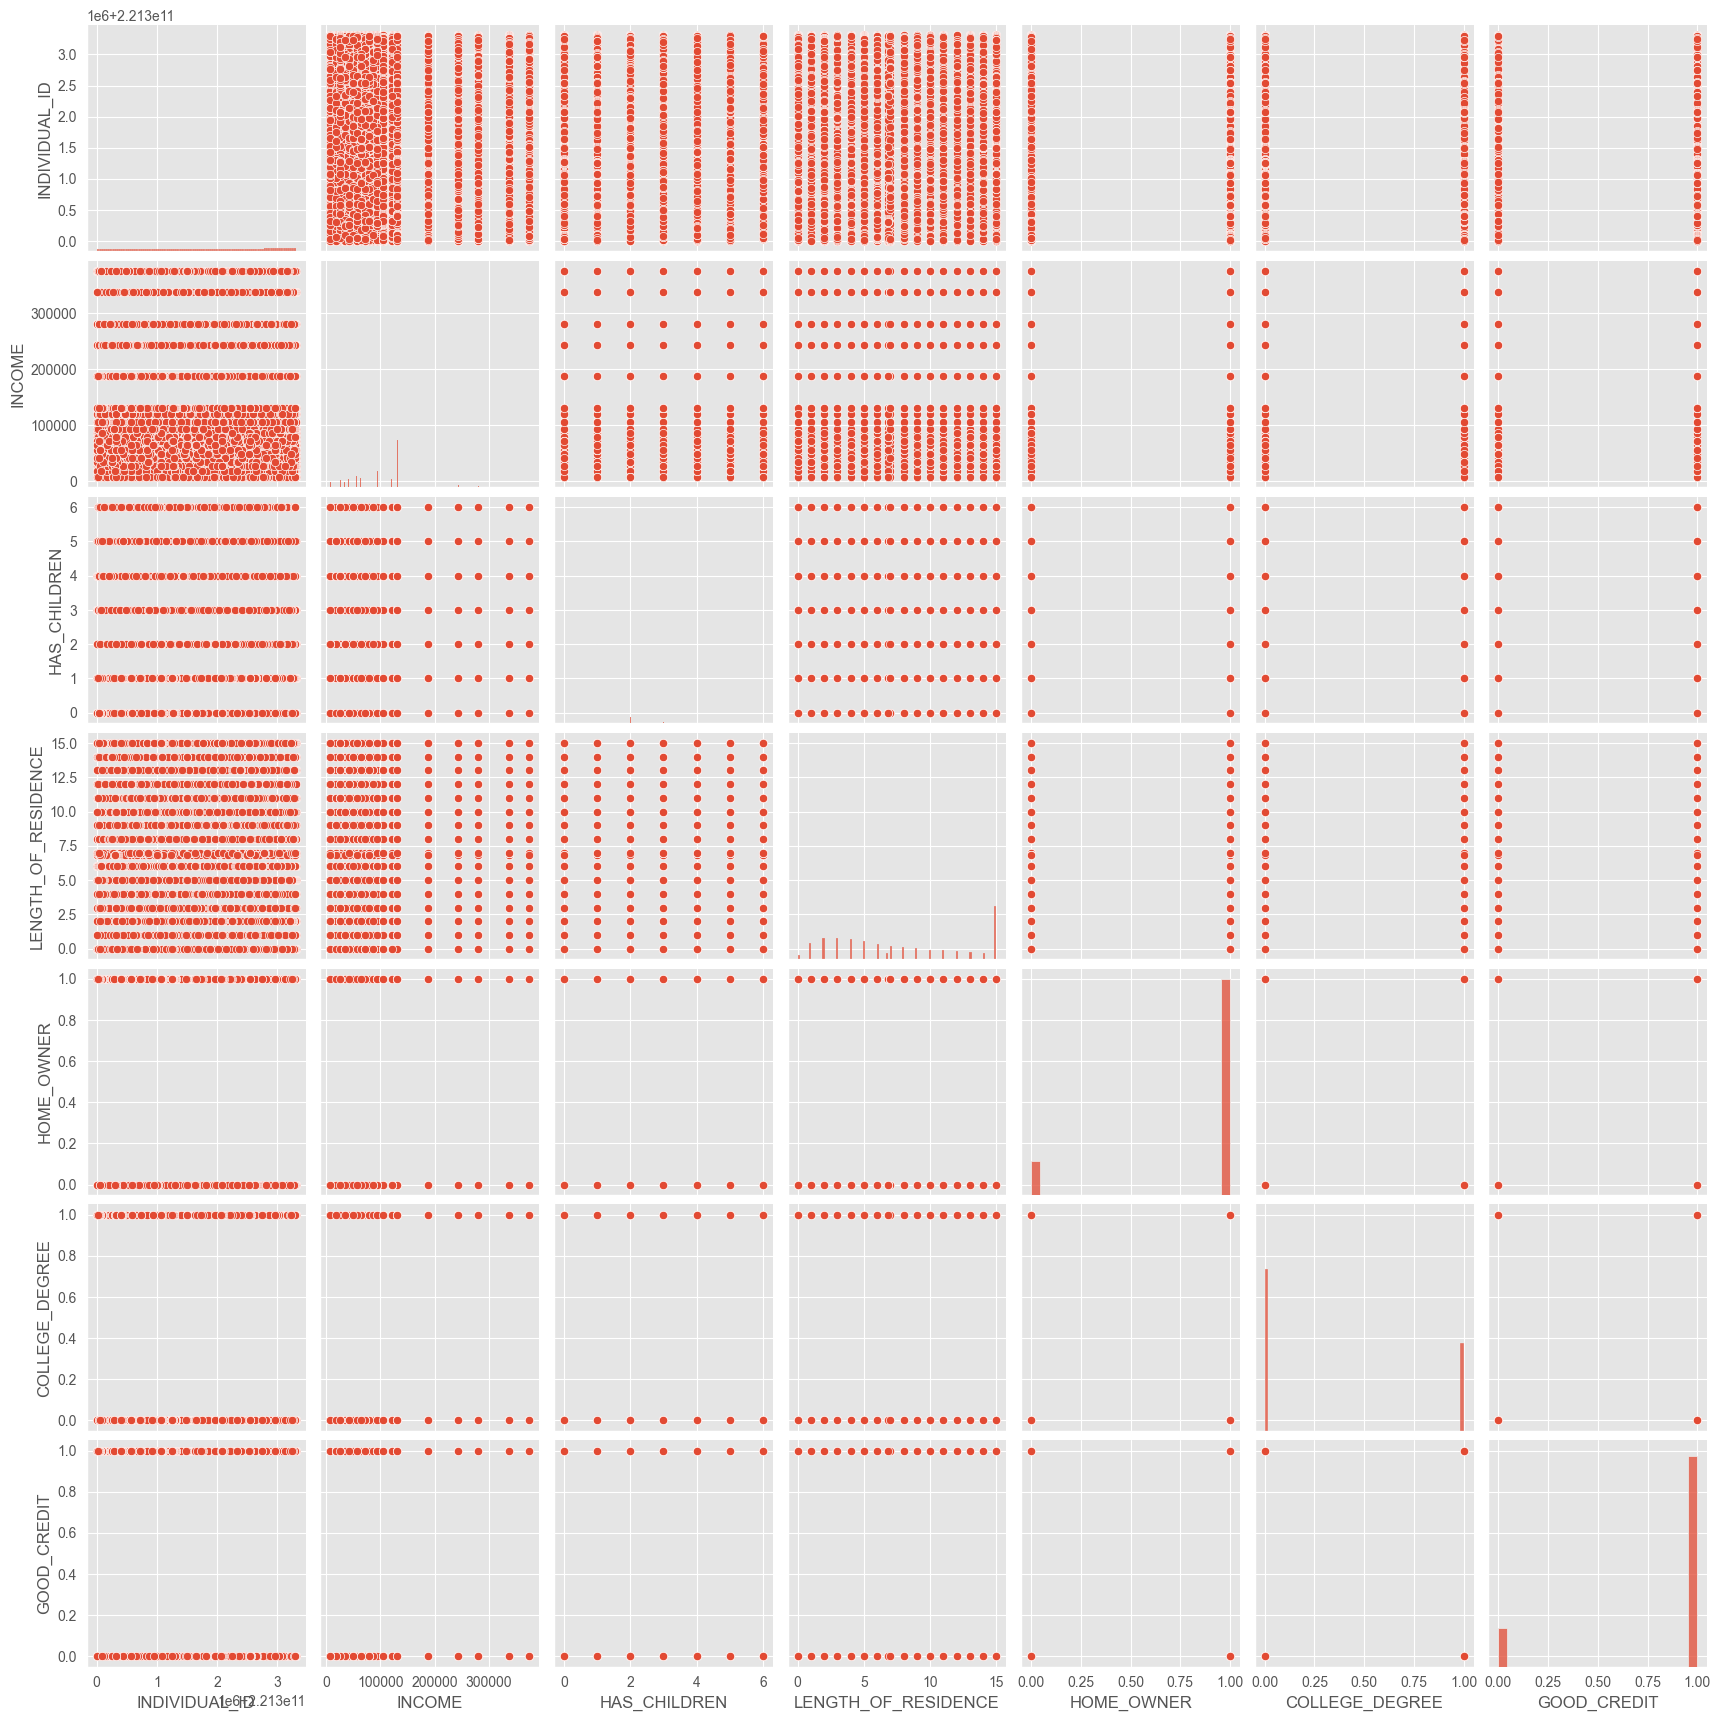

In [155]:
sns.pairplot(demographics_df)
plt.show()

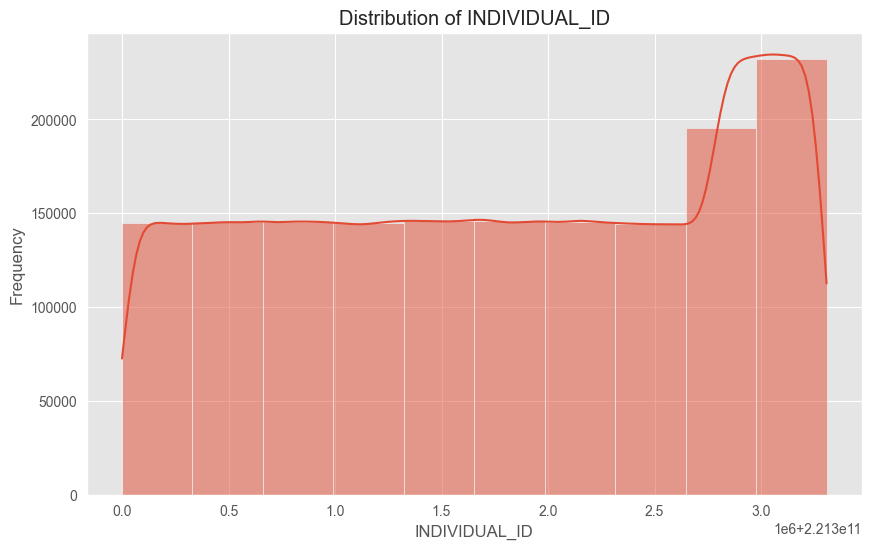

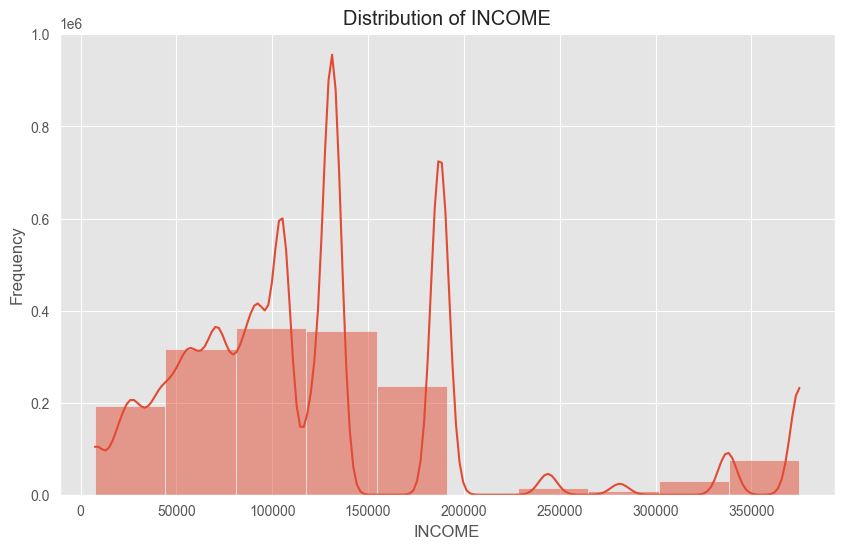

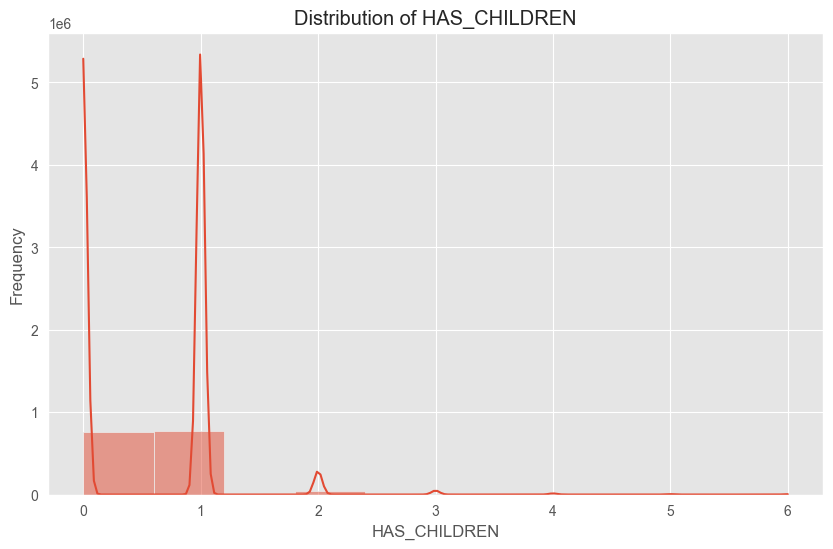

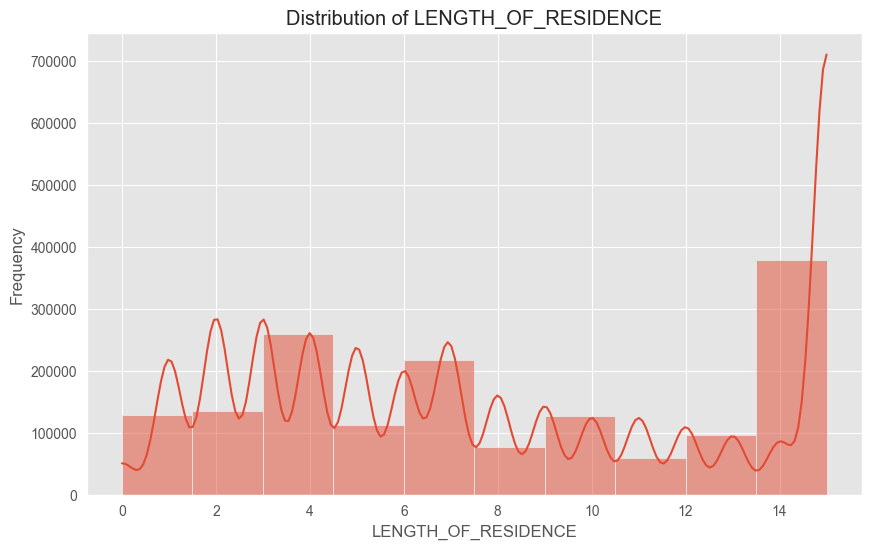

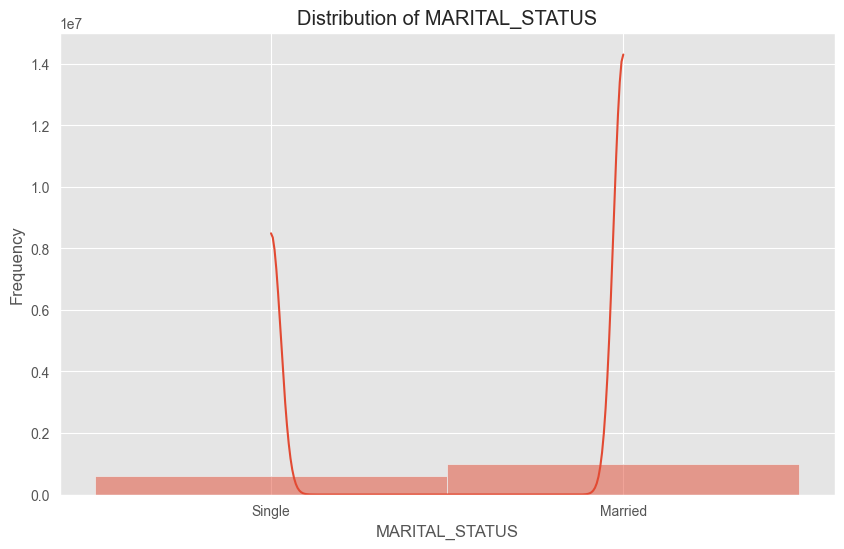

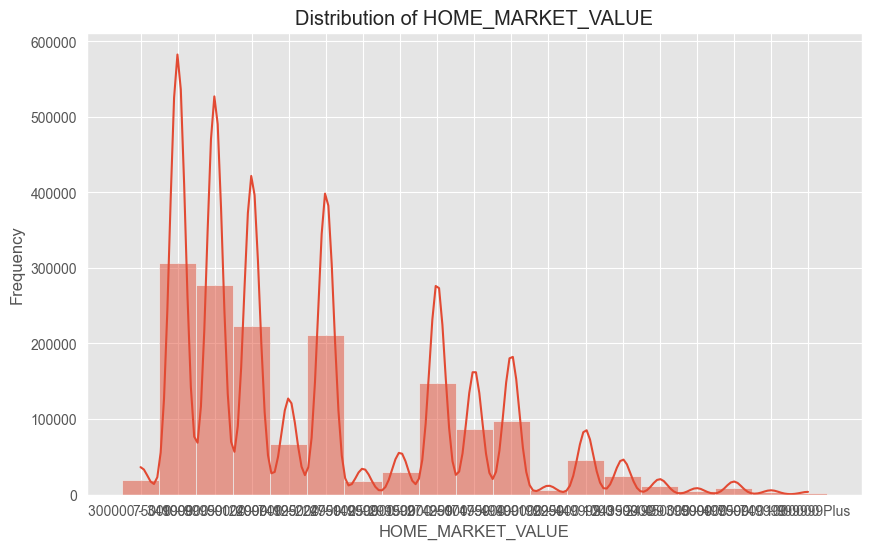

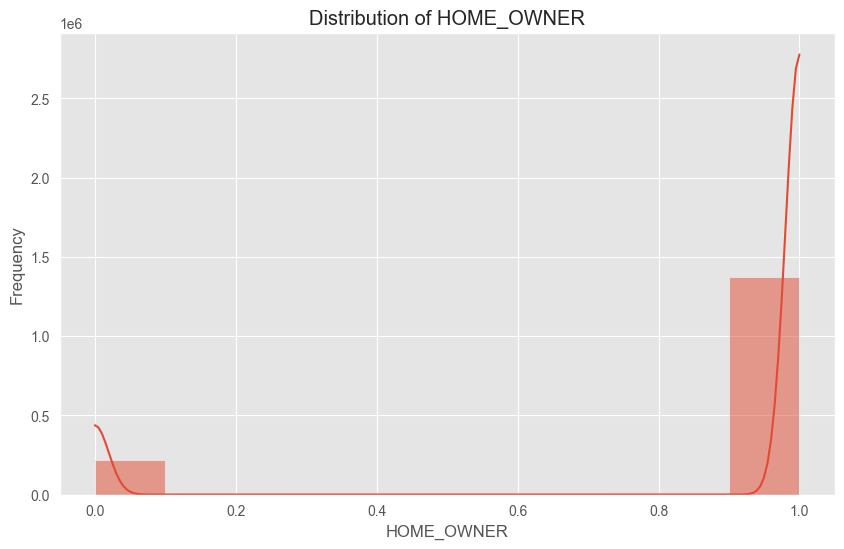

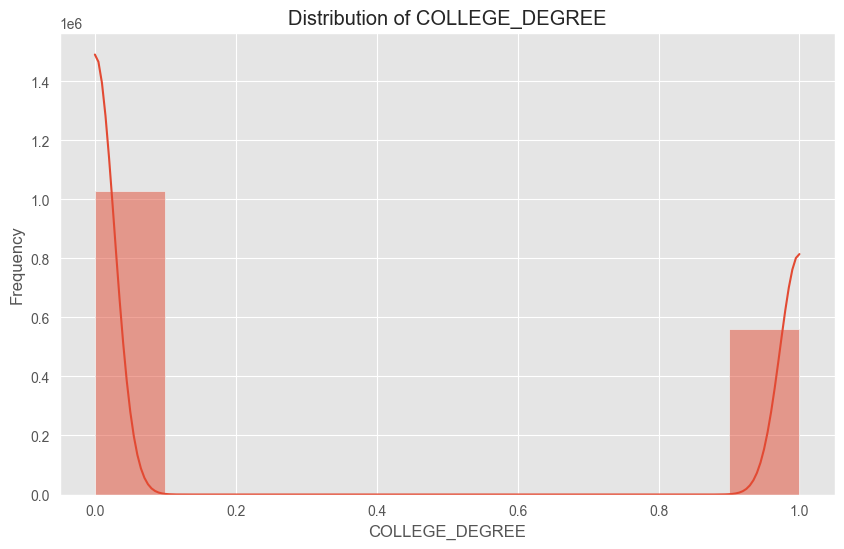

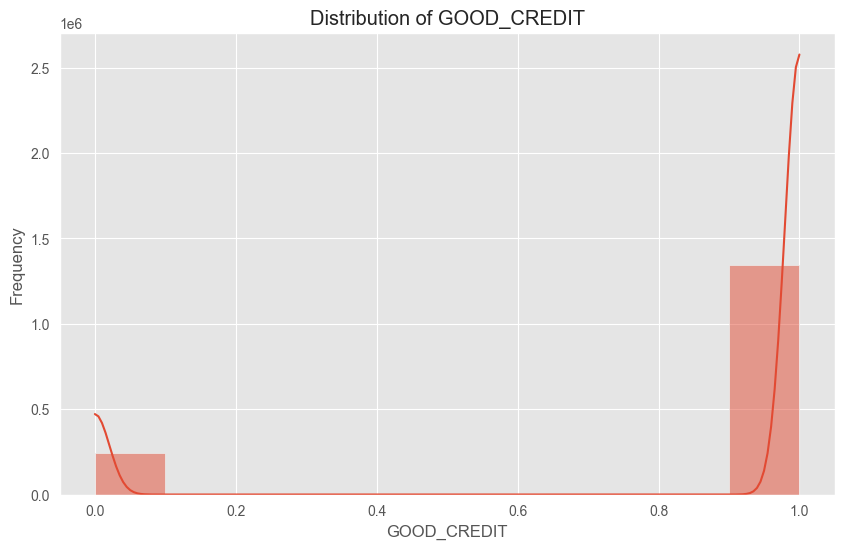

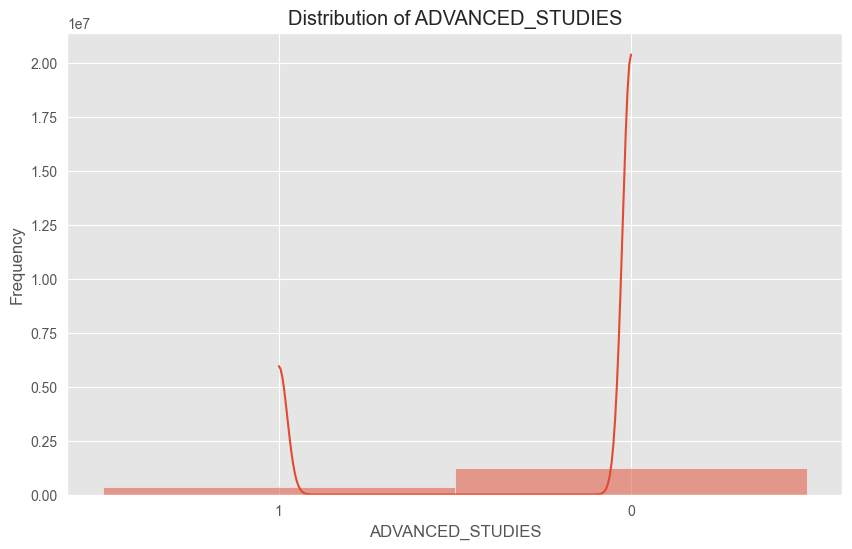

In [157]:
for column in demographics_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(demographics_df[column], kde=True, bins=10)  # Adjust the bins as needed
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##### Issues in the demographcis_df dataset

1. "Advanced Studies" column with "Y" and "N" values. Transformed these into boolean values

#### Termination_DF Short Statistics

In [7]:
termination_df.shape

(269259, 3)

In [8]:
termination_df

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16
...,...,...,...
269254,269254,2.213022e+11,2022-01-09
269255,269255,2.213007e+11,2022-02-27
269256,269256,2.213030e+11,2022-03-21
269257,269257,2.213025e+11,2022-02-26


In [9]:
termination_df.describe() 

,Unnamed: 0,INDIVIDUAL_ID
count,269259.000000,2.692590e+05
mean,134629.000000,2.213018e+11
std,77728.522403,9.890987e+05
min,0.000000,2.213000e+11
25%,67314.500000,2.213009e+11
50%,134629.000000,2.213018e+11
75%,201943.500000,2.213027e+11
max,269258.000000,2.213033e+11


In [35]:
termination_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269259 entries, 0 to 269258
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     269259 non-null  int64  
 1   INDIVIDUAL_ID  269259 non-null  float64
 2   SUSPD_DATE     266566 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [57]:
termination_df.duplicated().sum()

0

In [234]:
termination_df['SUSPD_DATE'] = pd.to_datetime(termination_df['SUSPD_DATE'])

In [229]:
termination_df.SUSPD_DATE.value_counts()

2022-03-17    938
2022-08-14    936
2022-09-20    923
2021-12-10    923
2022-08-23    920
             ... 
2026-05-24      1
2025-05-15      1
2025-02-11      1
2023-02-18      1
2026-10-30      1
Name: SUSPD_DATE, Length: 2086, dtype: int64

In [235]:
termination_df = termination_df[termination_df['SUSPD_DATE'].dt.year <= 2023]

In [237]:
termination_df.SUSPD_DATE.value_counts()


2022-03-17    938
2022-08-14    936
2022-09-20    923
2021-12-10    923
2022-08-23    920
             ... 
2023-01-13      1
2020-08-16      1
2021-10-26      1
2023-12-25      1
2022-12-30      1
Name: SUSPD_DATE, Length: 1215, dtype: int64

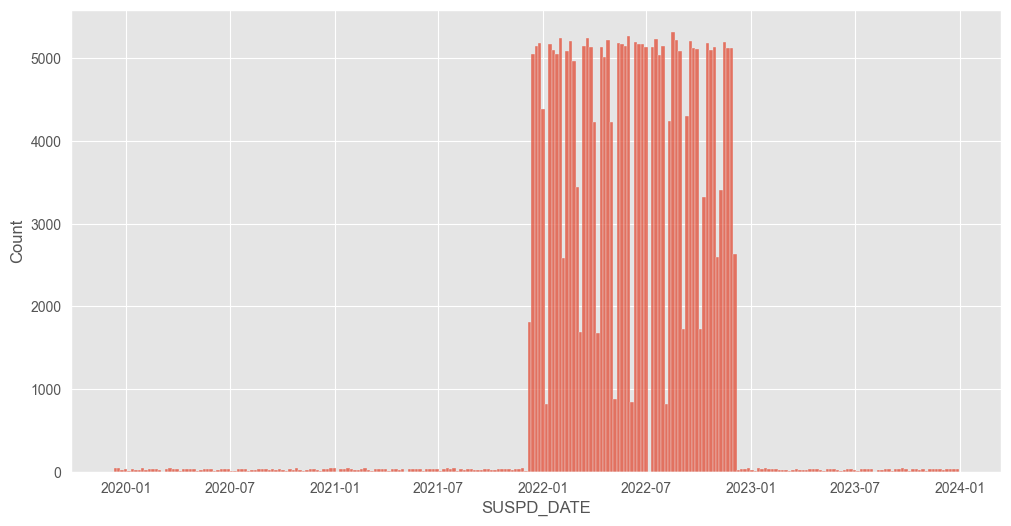

In [236]:
sns.histplot(termination_df['SUSPD_DATE'])
plt.show()

Checking if the termination ID's can match with the ID's of customer DF

In [40]:
termination_id_check = termination_df["INDIVIDUAL_ID"]

In [42]:
id_check_df = pd.merge(customer_df, termination_df, on="INDIVIDUAL_ID")

In [43]:
id_check_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271879 entries, 0 to 271878
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0_x            271879 non-null  int64  
 1   INDIVIDUAL_ID           271879 non-null  float64
 2   ADDRESS_ID              271879 non-null  float64
 3   CUST_ORIG_DATE          271879 non-null  object 
 4   DATE_OF_BIRTH           271879 non-null  object 
 5   SOCIAL_SECURITY_NUMBER  271879 non-null  object 
 6   CUST_START_DATE         261231 non-null  object 
 7   CURR_ANN_AMT_CAR        271879 non-null  float64
 8   CURR_ANN_AMT_HEALTH     271879 non-null  float64
 9   CURR_ANN_AMT_HOUSE      271879 non-null  int64  
 10  Unnamed: 0_y            271879 non-null  int64  
 11  SUSPD_DATE              269160 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 27.0+ MB


In [51]:
customer_df.loc[customer_df['INDIVIDUAL_ID'] == 2.213022e+11]

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
1981952,1981952,2.213022e+11,5.213008e+11,2005-09-11,1978-03-23,620-XX-2580,2005-09-11,1743.059911,600.825943,538


## Merging Dataframes

1.9 mil

In [83]:
customer_demographic_df = pd.merge(customer_df, demographics_df, on= "INDIVIDUAL_ID")

In [84]:
customer_demographic_df.shape

(1604572, 20)

In [85]:
customer_demographic_df.head()

,Unnamed: 0_x,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,Unnamed: 0_y,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,156415,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,585141,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,420154,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,2036951,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,984119,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y


In [86]:
# remove column "Unnamed: 0"
customer_demographic_df = customer_demographic_df.drop(axis=1, labels=["Unnamed: 0_x", "Unnamed: 0_y"])

In [87]:
customer_demographic_df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y


In [88]:
categorical_columns = customer_demographic_df.select_dtypes(include=['object', 'category']).columns

In [101]:
customer_demographic_df.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
count,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06,1.604572e+06
mean,2.213018e+11,5.213007e+11,1.443990e+03,5.775956e+02,4.332097e+02,1.227870e+05,5.631863e-01,7.905635e+00,8.640024e-01,3.533621e-01,8.453905e-01
std,9.934334e+05,4.178515e+05,2.471495e+02,1.903834e+02,7.700777e+01,8.192942e+04,5.988455e-01,4.966885e+00,3.427862e-01,4.780141e-01,3.615321e-01
min,2.213000e+11,5.213000e+11,3.056869e+02,-3.516244e+02,9.200000e+01,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,1.275457e+03,4.487859e+02,3.810000e+02,7.125000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.213018e+11,5.213007e+11,1.438846e+03,5.770387e+02,4.310000e+02,1.050000e+05,1.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,2.213027e+11,5.213010e+11,1.607283e+03,7.058470e+02,4.840000e+02,1.312500e+05,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00
max,2.213033e+11,5.213015e+11,2.769374e+03,1.617531e+03,8.660000e+02,3.750000e+05,6.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [89]:
customer_demographic_df.describe(include=["object", "bool"])

,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,MARITAL_STATUS,HOME_MARKET_VALUE,ADVANCED_STUDIES
count,1604572,1604572,1604572,1540897,1604572,1604572,1604572
unique,5241,1084,1442538,17639,2,19,2
top,2005-09-11,1967-07-07,501-XX-9005,2005-09-11,Married,75000 - 99999,N
freq,478145,135698,6,427103,1006806,309588,1242088


In [90]:
customer_demographic_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604572 entries, 0 to 1604571
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           1604572 non-null  float64
 1   ADDRESS_ID              1604572 non-null  float64
 2   CUST_ORIG_DATE          1604572 non-null  object 
 3   DATE_OF_BIRTH           1604572 non-null  object 
 4   SOCIAL_SECURITY_NUMBER  1604572 non-null  object 
 5   CUST_START_DATE         1540897 non-null  object 
 6   CURR_ANN_AMT_CAR        1604572 non-null  float64
 7   CURR_ANN_AMT_HEALTH     1604572 non-null  float64
 8   CURR_ANN_AMT_HOUSE      1604572 non-null  int64  
 9   INCOME                  1604572 non-null  float64
 10  HAS_CHILDREN            1604572 non-null  float64
 11  LENGTH_OF_RESIDENCE     1604572 non-null  float64
 12  MARITAL_STATUS          1604572 non-null  object 
 13  HOME_MARKET_VALUE       1604572 non-null  object 
 14  HO

Replace NaN values in "CUST_START_DATE" with "2005-09-11", since this is the most popular value and can be assumed to be a dummy for NaN's. 

In [97]:
customer_demographic_df["CUST_START_DATE"].fillna("2005-09-11", inplace=True)


In [98]:
customer_demographic_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604572 entries, 0 to 1604571
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   INDIVIDUAL_ID           1604572 non-null  float64
 1   ADDRESS_ID              1604572 non-null  float64
 2   CUST_ORIG_DATE          1604572 non-null  object 
 3   DATE_OF_BIRTH           1604572 non-null  object 
 4   SOCIAL_SECURITY_NUMBER  1604572 non-null  object 
 5   CUST_START_DATE         1604572 non-null  object 
 6   CURR_ANN_AMT_CAR        1604572 non-null  float64
 7   CURR_ANN_AMT_HEALTH     1604572 non-null  float64
 8   CURR_ANN_AMT_HOUSE      1604572 non-null  int64  
 9   INCOME                  1604572 non-null  float64
 10  HAS_CHILDREN            1604572 non-null  float64
 11  LENGTH_OF_RESIDENCE     1604572 non-null  float64
 12  MARITAL_STATUS          1604572 non-null  object 
 13  HOME_MARKET_VALUE       1604572 non-null  object 
 14  HO

In [100]:
# Show Value Counts for all categorical columns
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(customer_demographic_df[column].value_counts())
    print()  

Value counts for CUST_ORIG_DATE:
2005-09-11    478145
2022-09-13     14210
2019-08-16     13654
2022-06-24      7889
2014-02-15      7000
               ...  
2014-04-05         1
2014-04-18         1
2010-03-17         1
2006-04-02         1
2021-02-12         1
Name: CUST_ORIG_DATE, Length: 5241, dtype: int64

Value counts for DATE_OF_BIRTH:
1967-07-07    135698
1970-07-26      3676
1967-06-27      3671
1968-06-26      3641
1970-06-25      3627
               ...  
1909-07-10         1
1912-02-08         1
1910-07-10         1
1911-04-10         1
1910-10-10         1
Name: DATE_OF_BIRTH, Length: 1084, dtype: int64

Value counts for SOCIAL_SECURITY_NUMBER:
501-XX-9005    6
600-XX-4217    6
537-XX-5110    5
518-XX-7656    5
896-XX-3997    5
              ..
922-XX-6540    1
775-XX-8869    1
893-XX-5291    1
153-XX-8881    1
520-XX-7573    1
Name: SOCIAL_SECURITY_NUMBER, Length: 1442538, dtype: int64

Value counts for CUST_START_DATE:
2005-09-11    490778
2022-09-13     12719
2019-08-1

In [99]:
customer_demographic_df.CUST_START_DATE.isna().sum()

0

### Further Context Data Quality Checks

Completeness
Consistency
Correctness
Uniqueness
Timeliness
Stability
Relevance
Contextualization
Trustworthiness

Target Variable: Terminated

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

#### Q3.2 Build a second model and compare the model performance. (15 points)

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)